In [15]:
MAX_EPOCHS = 800

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
import numpy as np

np.random.seed(2022)

In [4]:
# Windows で music21 を使うための余分なコード
import os
from music21 import environment

if os.name == 'nt':
    us = environment.UserSettings()
    us['musescoreDirectPNGPath']='C:/Program Files/MuseScore 3/bin/MuseScore3.exe'
    us['musicxmlPath']='C:/Program Files/MuseScore 3/bin/MuseScore3.exe'

In [5]:
data_filepath = 'run/music_params.pkl'
save_path = 'run'

In [6]:
import sys
sys.path.append('./nw')

from LSTMMusic import ScoreDataset

if not os.path.exists(data_filepath):
    data_seq = ScoreDataset(save_path=data_filepath, midi_paths=midi_paths, seq_len=32)
else:
    data_seq = ScoreDataset(save_path=data_filepath)

In [7]:
# split data into train and val data.
import numpy as np

val_split = 0.05

N_DATA = len(data_seq)
N_VAL = int(N_DATA * val_split)

arr = np.arange(N_DATA)
np.random.shuffle(arr)

train_indices = sorted(arr[:-N_VAL])
val_indices = sorted(arr[-N_VAL:])

(train_x_notes, train_x_durations), (train_y_notes, train_y_durations) = data_seq[train_indices]
(val_x_notes, val_x_durations), (val_y_notes, val_y_durations) = data_seq[val_indices]

print(len(train_indices), len(val_indices))

25184 1325


In [8]:
print(train_indices[:20])
print(val_indices[:20])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20]
[16, 30, 38, 48, 57, 61, 65, 121, 150, 155, 206, 211, 213, 309, 311, 339, 352, 389, 397, 429]


In [9]:
train_x_notes = np.array(train_x_notes)
train_x_durations = np.array(train_x_durations)

val_x_notes = np.array(val_x_notes)
val_x_durations = np.array(val_x_durations)

In [10]:
import tensorflow as tf

train_y_notes_ohv = tf.keras.utils.to_categorical(train_y_notes, data_seq.c_notes)
train_y_durations_ohv = tf.keras.utils.to_categorical(train_y_durations, data_seq.c_durations)

val_y_notes_ohv = tf.keras.utils.to_categorical(val_y_notes, data_seq.c_notes)
val_y_durations_ohv = tf.keras.utils.to_categorical(val_y_durations, data_seq.c_durations)

# さらに訓練する

In [11]:
import sys
sys.path.append('./nw')

from LSTMMusic import LSTMMusic

lstm_music = LSTMMusic.load(save_path)
print(lstm_music.epochs)

10


In [16]:
h = lstm_music.train(
        (train_x_notes, train_x_durations), 
        (train_y_notes_ohv, train_y_durations_ohv),
        epochs=MAX_EPOCHS,
        batch_size=32,
        run_folder = save_path,
        print_step_interval=1000,
        save_epoch_interval=50,
        validation_data = ((val_x_notes, val_x_durations), (val_y_notes_ohv, val_y_durations_ohv))
)

print(lstm_music.epochs)

201/800 loss 0.201 pitch_loss 0.164 duration_loss 0.037 val_loss 3.196 val_pitch_loss 2.845 val_duration_loss 0.350 0:00:07.879335
202/800 loss 0.176 pitch_loss 0.147 duration_loss 0.028 val_loss 3.273 val_pitch_loss 2.894 val_duration_loss 0.379 0:00:16.461217
203/800 loss 0.164 pitch_loss 0.139 duration_loss 0.025 val_loss 3.336 val_pitch_loss 2.956 val_duration_loss 0.380 0:00:34.577219
204/800 loss 0.163 pitch_loss 0.134 duration_loss 0.029 val_loss 3.241 val_pitch_loss 2.873 val_duration_loss 0.367 0:00:43.760804
205/800 loss 0.169 pitch_loss 0.139 duration_loss 0.031 val_loss 3.264 val_pitch_loss 2.894 val_duration_loss 0.370 0:00:52.971124
206/800 loss 0.186 pitch_loss 0.157 duration_loss 0.029 val_loss 3.331 val_pitch_loss 2.907 val_duration_loss 0.423 0:01:02.374826
207/800 loss 0.201 pitch_loss 0.170 duration_loss 0.031 val_loss 3.301 val_pitch_loss 2.868 val_duration_loss 0.432 0:01:11.570708
208/800 loss 0.182 pitch_loss 0.152 duration_loss 0.030 val_loss 3.280 val_pitch_lo

264/800 loss 0.157 pitch_loss 0.131 duration_loss 0.026 val_loss 3.439 val_pitch_loss 3.032 val_duration_loss 0.407 0:09:59.212349
265/800 loss 0.145 pitch_loss 0.124 duration_loss 0.021 val_loss 3.378 val_pitch_loss 2.940 val_duration_loss 0.438 0:10:08.416882
266/800 loss 0.156 pitch_loss 0.131 duration_loss 0.025 val_loss 3.392 val_pitch_loss 2.998 val_duration_loss 0.394 0:10:17.587811
267/800 loss 0.171 pitch_loss 0.141 duration_loss 0.030 val_loss 3.482 val_pitch_loss 3.074 val_duration_loss 0.407 0:10:26.842716
268/800 loss 0.176 pitch_loss 0.145 duration_loss 0.031 val_loss 3.385 val_pitch_loss 3.001 val_duration_loss 0.384 0:10:36.204681
269/800 loss 0.166 pitch_loss 0.139 duration_loss 0.027 val_loss 3.375 val_pitch_loss 2.970 val_duration_loss 0.405 0:10:45.392635
270/800 loss 0.154 pitch_loss 0.127 duration_loss 0.027 val_loss 3.399 val_pitch_loss 3.011 val_duration_loss 0.388 0:10:54.505540
271/800 loss 0.179 pitch_loss 0.146 duration_loss 0.033 val_loss 3.391 val_pitch_lo

327/800 loss 0.157 pitch_loss 0.131 duration_loss 0.026 val_loss 3.387 val_pitch_loss 2.967 val_duration_loss 0.420 0:19:42.493709
328/800 loss 0.153 pitch_loss 0.128 duration_loss 0.026 val_loss 3.397 val_pitch_loss 2.983 val_duration_loss 0.415 0:19:51.685032
329/800 loss 0.157 pitch_loss 0.131 duration_loss 0.026 val_loss 3.451 val_pitch_loss 3.024 val_duration_loss 0.427 0:20:00.891981
330/800 loss 0.147 pitch_loss 0.122 duration_loss 0.024 val_loss 3.407 val_pitch_loss 2.975 val_duration_loss 0.432 0:20:10.077866
331/800 loss 0.155 pitch_loss 0.129 duration_loss 0.026 val_loss 3.463 val_pitch_loss 3.026 val_duration_loss 0.437 0:20:19.253542
332/800 loss 0.168 pitch_loss 0.142 duration_loss 0.026 val_loss 3.382 val_pitch_loss 2.943 val_duration_loss 0.439 0:20:28.575711
333/800 loss 0.156 pitch_loss 0.129 duration_loss 0.027 val_loss 3.427 val_pitch_loss 2.992 val_duration_loss 0.435 0:20:37.753478
334/800 loss 0.164 pitch_loss 0.137 duration_loss 0.027 val_loss 3.466 val_pitch_lo

390/800 loss 0.179 pitch_loss 0.148 duration_loss 0.031 val_loss 3.492 val_pitch_loss 3.090 val_duration_loss 0.402 0:29:32.606849
391/800 loss 0.167 pitch_loss 0.139 duration_loss 0.029 val_loss 3.525 val_pitch_loss 3.091 val_duration_loss 0.434 0:29:40.995315
392/800 loss 0.186 pitch_loss 0.157 duration_loss 0.030 val_loss 3.644 val_pitch_loss 3.220 val_duration_loss 0.425 0:29:49.443454
393/800 loss 0.181 pitch_loss 0.149 duration_loss 0.032 val_loss 3.511 val_pitch_loss 3.085 val_duration_loss 0.426 0:29:58.104774
394/800 loss 0.191 pitch_loss 0.159 duration_loss 0.031 val_loss 3.478 val_pitch_loss 3.080 val_duration_loss 0.397 0:30:06.538732
395/800 loss 0.166 pitch_loss 0.137 duration_loss 0.029 val_loss 3.421 val_pitch_loss 3.042 val_duration_loss 0.380 0:30:14.910258
396/800 loss 0.149 pitch_loss 0.121 duration_loss 0.028 val_loss 3.501 val_pitch_loss 3.084 val_duration_loss 0.417 0:30:23.390439
397/800 loss 0.144 pitch_loss 0.121 duration_loss 0.024 val_loss 3.432 val_pitch_lo

453/800 loss 0.164 pitch_loss 0.136 duration_loss 0.028 val_loss 3.433 val_pitch_loss 3.006 val_duration_loss 0.427 0:38:53.523887
454/800 loss 0.154 pitch_loss 0.127 duration_loss 0.026 val_loss 3.517 val_pitch_loss 3.054 val_duration_loss 0.462 0:39:04.500805
455/800 loss 0.176 pitch_loss 0.145 duration_loss 0.031 val_loss 3.503 val_pitch_loss 3.077 val_duration_loss 0.427 0:39:13.108642
456/800 loss 0.190 pitch_loss 0.156 duration_loss 0.034 val_loss 3.503 val_pitch_loss 3.063 val_duration_loss 0.440 0:39:21.451771
457/800 loss 0.200 pitch_loss 0.163 duration_loss 0.038 val_loss 3.480 val_pitch_loss 3.047 val_duration_loss 0.433 0:39:29.945727
458/800 loss 0.181 pitch_loss 0.148 duration_loss 0.033 val_loss 3.526 val_pitch_loss 3.096 val_duration_loss 0.430 0:39:38.413057
459/800 loss 0.148 pitch_loss 0.124 duration_loss 0.024 val_loss 3.497 val_pitch_loss 3.094 val_duration_loss 0.403 0:39:46.748102
460/800 loss 0.147 pitch_loss 0.123 duration_loss 0.023 val_loss 3.484 val_pitch_lo

516/800 loss 0.167 pitch_loss 0.139 duration_loss 0.028 val_loss 3.541 val_pitch_loss 3.082 val_duration_loss 0.459 0:48:30.455882
517/800 loss 0.164 pitch_loss 0.134 duration_loss 0.031 val_loss 3.582 val_pitch_loss 3.096 val_duration_loss 0.486 0:48:39.657442
518/800 loss 0.169 pitch_loss 0.140 duration_loss 0.030 val_loss 3.662 val_pitch_loss 3.168 val_duration_loss 0.494 0:48:48.770173
519/800 loss 0.173 pitch_loss 0.141 duration_loss 0.032 val_loss 3.588 val_pitch_loss 3.140 val_duration_loss 0.448 0:48:57.935153
520/800 loss 0.183 pitch_loss 0.151 duration_loss 0.032 val_loss 3.521 val_pitch_loss 3.107 val_duration_loss 0.413 0:49:06.945305
521/800 loss 0.208 pitch_loss 0.177 duration_loss 0.031 val_loss 3.579 val_pitch_loss 3.130 val_duration_loss 0.449 0:49:16.051125
522/800 loss 0.192 pitch_loss 0.161 duration_loss 0.030 val_loss 3.637 val_pitch_loss 3.208 val_duration_loss 0.428 0:49:25.255414
523/800 loss 0.178 pitch_loss 0.148 duration_loss 0.031 val_loss 3.604 val_pitch_lo

579/800 loss 0.200 pitch_loss 0.164 duration_loss 0.036 val_loss 3.607 val_pitch_loss 3.160 val_duration_loss 0.447 0:58:03.776946
580/800 loss 0.193 pitch_loss 0.159 duration_loss 0.034 val_loss 3.620 val_pitch_loss 3.161 val_duration_loss 0.459 0:58:13.021608
581/800 loss 0.168 pitch_loss 0.137 duration_loss 0.031 val_loss 3.652 val_pitch_loss 3.174 val_duration_loss 0.478 0:58:22.144447
582/800 loss 0.180 pitch_loss 0.147 duration_loss 0.033 val_loss 3.609 val_pitch_loss 3.141 val_duration_loss 0.468 0:58:31.235685
583/800 loss 0.198 pitch_loss 0.162 duration_loss 0.036 val_loss 3.680 val_pitch_loss 3.224 val_duration_loss 0.456 0:58:40.379631
584/800 loss 0.203 pitch_loss 0.170 duration_loss 0.033 val_loss 3.634 val_pitch_loss 3.204 val_duration_loss 0.430 0:58:49.525674
585/800 loss 0.172 pitch_loss 0.140 duration_loss 0.031 val_loss 3.585 val_pitch_loss 3.151 val_duration_loss 0.434 0:58:57.981916
586/800 loss 0.179 pitch_loss 0.144 duration_loss 0.034 val_loss 3.674 val_pitch_lo

642/800 loss 0.201 pitch_loss 0.167 duration_loss 0.034 val_loss 3.626 val_pitch_loss 3.179 val_duration_loss 0.447 1:07:33.273837
643/800 loss 0.213 pitch_loss 0.176 duration_loss 0.037 val_loss 3.538 val_pitch_loss 3.078 val_duration_loss 0.460 1:07:42.129104
644/800 loss 0.189 pitch_loss 0.155 duration_loss 0.035 val_loss 3.502 val_pitch_loss 3.088 val_duration_loss 0.414 1:07:50.958033
645/800 loss 0.179 pitch_loss 0.145 duration_loss 0.034 val_loss 3.722 val_pitch_loss 3.287 val_duration_loss 0.435 1:07:59.887202
646/800 loss 0.202 pitch_loss 0.166 duration_loss 0.036 val_loss 3.723 val_pitch_loss 3.250 val_duration_loss 0.472 1:08:08.701414
647/800 loss 0.189 pitch_loss 0.155 duration_loss 0.034 val_loss 3.658 val_pitch_loss 3.168 val_duration_loss 0.490 1:08:17.587057
648/800 loss 0.189 pitch_loss 0.155 duration_loss 0.033 val_loss 3.569 val_pitch_loss 3.126 val_duration_loss 0.442 1:08:26.437609
649/800 loss 0.178 pitch_loss 0.148 duration_loss 0.030 val_loss 3.654 val_pitch_lo

705/800 loss 0.210 pitch_loss 0.170 duration_loss 0.040 val_loss 3.695 val_pitch_loss 3.255 val_duration_loss 0.439 1:17:00.334452
706/800 loss 0.219 pitch_loss 0.180 duration_loss 0.039 val_loss 3.497 val_pitch_loss 3.077 val_duration_loss 0.420 1:17:09.141443
707/800 loss 0.211 pitch_loss 0.173 duration_loss 0.038 val_loss 3.596 val_pitch_loss 3.157 val_duration_loss 0.439 1:17:18.046556
708/800 loss 0.178 pitch_loss 0.148 duration_loss 0.031 val_loss 3.523 val_pitch_loss 3.056 val_duration_loss 0.467 1:17:26.875073
709/800 loss 0.164 pitch_loss 0.136 duration_loss 0.028 val_loss 3.517 val_pitch_loss 3.059 val_duration_loss 0.458 1:17:35.644525
710/800 loss 0.198 pitch_loss 0.162 duration_loss 0.036 val_loss 3.660 val_pitch_loss 3.194 val_duration_loss 0.466 1:17:44.419082
711/800 loss 0.203 pitch_loss 0.171 duration_loss 0.032 val_loss 3.615 val_pitch_loss 3.190 val_duration_loss 0.425 1:17:53.235860
712/800 loss 0.190 pitch_loss 0.154 duration_loss 0.036 val_loss 3.529 val_pitch_lo

768/800 loss 0.180 pitch_loss 0.148 duration_loss 0.032 val_loss 3.570 val_pitch_loss 3.132 val_duration_loss 0.438 1:26:21.201262
769/800 loss 0.178 pitch_loss 0.148 duration_loss 0.030 val_loss 3.605 val_pitch_loss 3.197 val_duration_loss 0.408 1:26:29.988699
770/800 loss 0.203 pitch_loss 0.168 duration_loss 0.035 val_loss 3.585 val_pitch_loss 3.157 val_duration_loss 0.428 1:26:38.708458
771/800 loss 0.230 pitch_loss 0.191 duration_loss 0.040 val_loss 3.651 val_pitch_loss 3.189 val_duration_loss 0.462 1:26:47.558048
772/800 loss 0.197 pitch_loss 0.163 duration_loss 0.034 val_loss 3.641 val_pitch_loss 3.149 val_duration_loss 0.492 1:26:56.370456
773/800 loss 0.186 pitch_loss 0.154 duration_loss 0.032 val_loss 3.572 val_pitch_loss 3.118 val_duration_loss 0.454 1:27:05.151410
774/800 loss 0.174 pitch_loss 0.145 duration_loss 0.029 val_loss 3.548 val_pitch_loss 3.104 val_duration_loss 0.444 1:27:13.941887
775/800 loss 0.193 pitch_loss 0.160 duration_loss 0.033 val_loss 3.469 val_pitch_lo

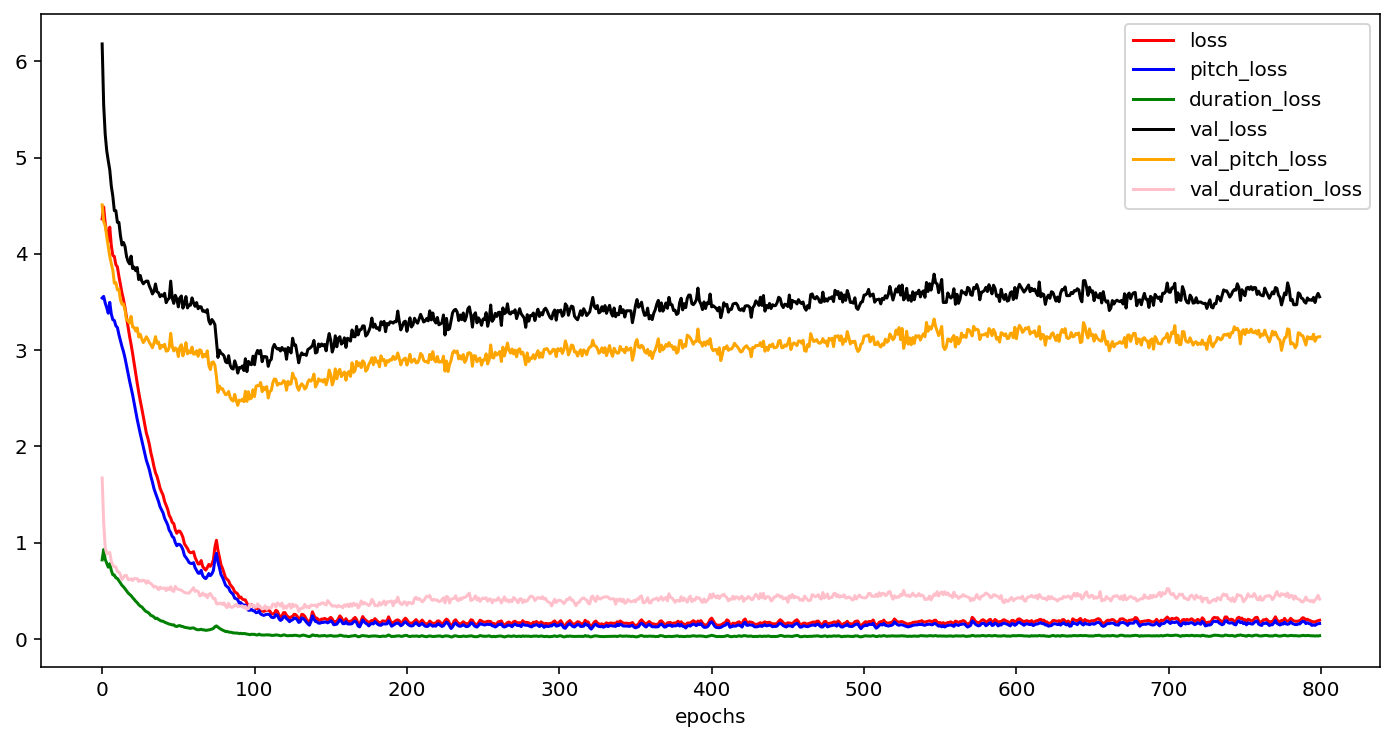

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

LSTMMusic.plot_history(
    [
        lstm_music.losses, lstm_music.n_losses, lstm_music.d_losses,
        lstm_music.val_losses, lstm_music.val_n_losses, lstm_music.val_d_losses
    ],
    [
        'loss', 'pitch_loss', 'duration_loss', 'val_loss', 'val_pitch_loss', 'val_duration_loss' 
    ]
)